# Importing required lib

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import mean_squared_error,accuracy_score

## import dataset

In [2]:
toyata_data = pd.read_csv('ToyotaCorolla.csv')
toyata_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyata_data.shape

(1436, 38)

In [3]:
toyata_newdata = toyata_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyata_newdata

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Initial analysis

In [4]:
toyata_newdata.shape

(1436, 9)

In [5]:
toyata_newdata.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [6]:
toyata_newdata.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
toyata_newdata[toyata_newdata.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toya_data = toyata_newdata.drop_duplicates().reset_index(drop = True)
toya_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [11]:
toya_data.shape

(1435, 9)

## Correlation matrix

In [12]:
toya_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## scatter plot between variable

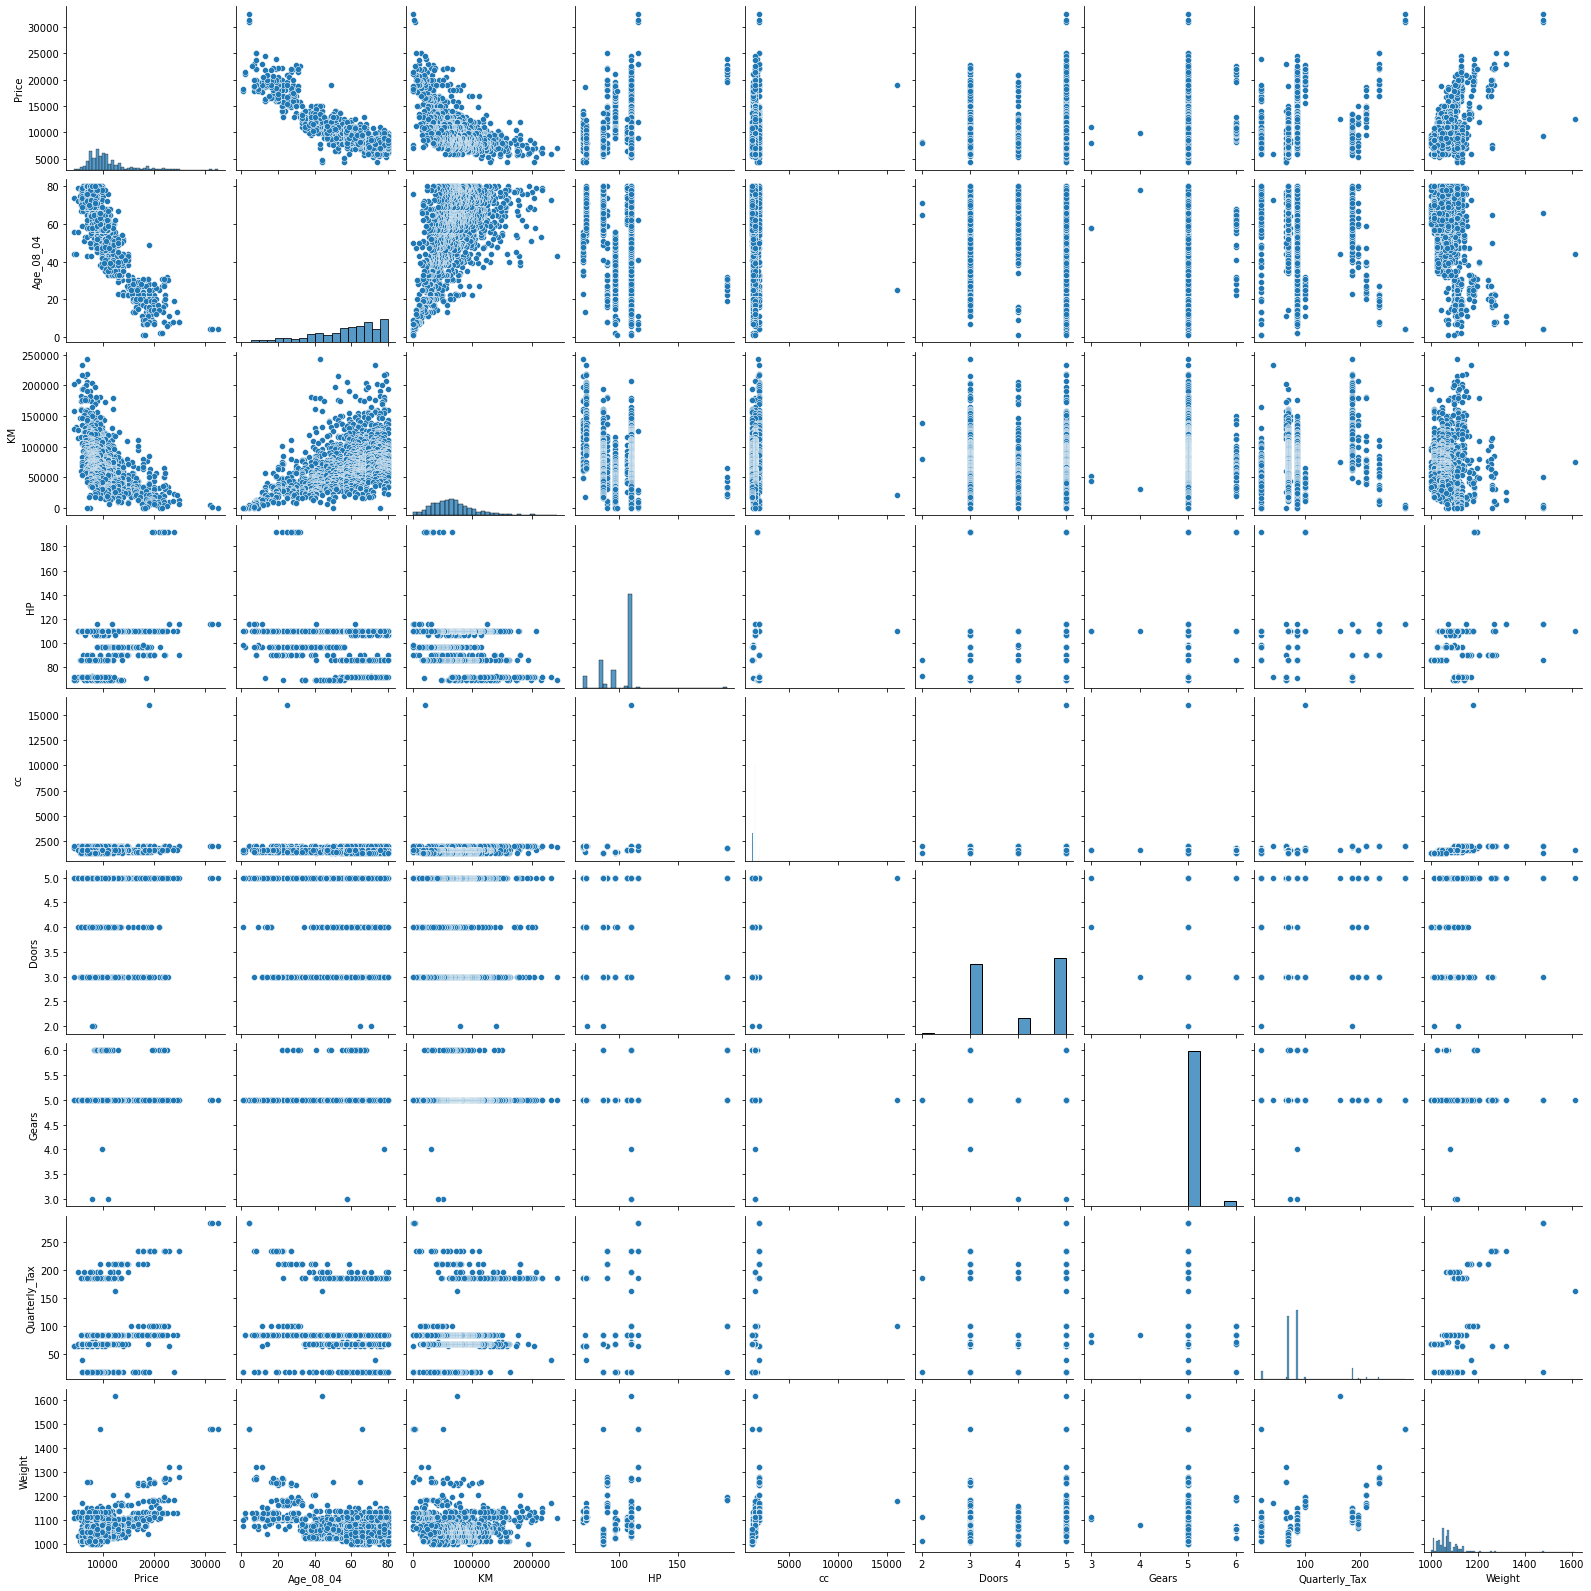

In [18]:
sns.pairplot(data = toya_data)
plt.show()

## preparing a model

In [22]:
# import statsmodels.formulas.api as smf  ---- use
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = toya_data).fit()

In [23]:
# model coefficient
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [30]:
# calculate t values and p values
model.tvalues,'/n',np.round(model.pvalues,4)

(Intercept        -3.875273
 Age_08_04       -46.551876
 KM              -16.552424
 HP               11.209719
 cc               -1.316436
 Doors            -0.023012
 Gears             3.034563
 Quarterly_Tax     2.944198
 Weight           15.760663
 dtype: float64,
 '/n',
 Intercept        0.0001
 Age_08_04        0.0000
 KM               0.0000
 HP               0.0000
 cc               0.1882
 Doors            0.9816
 Gears            0.0025
 Quarterly_Tax    0.0033
 Weight           0.0000
 dtype: float64)

In [32]:
# R square value
print('Rsquare value     :',model.rsquared)
print('adj_rsquare value :',model.rsquared_adj)

Rsquare value     : 0.8625200256947
adj_rsquare value : 0.8617487495415146


## build SLM and MLM for insignificant variable (cc and doors)
* also calculate pvalues and tvalues 

In [38]:
model_1 = smf.ols('Price~cc',data = toya_data).fit()
model_1.tvalues,model_1.pvalues   # cc is significant because pvalue of cc is small.

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [39]:
model_2 = smf.ols('Price~Doors',data = toya_data).fit()
model_2.tvalues,model_2.pvalues   # Doors is significant because pvalue of doors is small.

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [40]:
model_3 = smf.ols('Price~Doors+cc',data = toya_data).fit()
model_3.tvalues,model_3.pvalues   # Doors and cc is significant because pvalue is small.

(Intercept    12.786341
 Doors         6.752236
 cc            4.268006
 dtype: float64,
 Intercept    1.580945e-35
 Doors        2.109558e-11
 cc           2.101878e-05
 dtype: float64)

In [43]:
rsqu_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_age = 1/(1-rsqu_age)

rsqu_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_km = 1/(1-rsqu_km)

rsqu_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_hp = 1/(1-rsqu_hp)

rsqu_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_cc = 1/(1-rsqu_cc)

rsqu_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_doors = 1/(1-rsqu_doors)

rsqu_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data = toya_data).fit().rsquared
vif_gears = 1/(1-rsqu_gears)

rsqu_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data = toya_data).fit().rsquared
vif_tax = 1/(1-rsqu_tax)

rsqu_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = toya_data).fit().rsquared
vif_weight = 1/(1-rsqu_weight)

data = {'data':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_tax','Weight'],
        'vif': [vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
df_data = pd.DataFrame(data = data)
df_data

,data,vif
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_tax,2.295375
7,Weight,2.487180


In [45]:
# all variable vif value<10 so it indicate no multicollinearity between them, so it all in the regression equation

## residual analysis

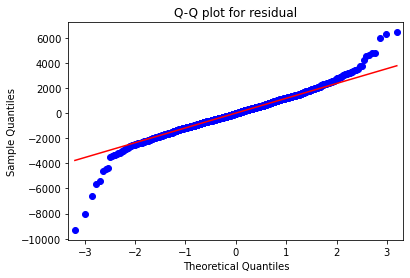

In [47]:
# import statsmodels.api as sm -- use
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Q-Q plot for residual')
plt.show()

In [48]:
list(np.where(model.resid>6000))   # here is the residule outlier in qq plot

[array([109, 146, 522], dtype=int64)]

In [50]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

## Residual plot for homoscedasticity 

In [51]:
def standard_value(vals):
    return (vals-vals.mean())/(vals.std())

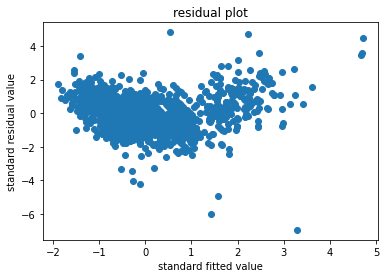

In [53]:
plt.scatter(standard_value(model.fittedvalues),standard_value(model.resid))
plt.xlabel('standard fitted value')
plt.ylabel('standard residual value')
plt.title('residual plot')
plt.show()

## residual vs regressors

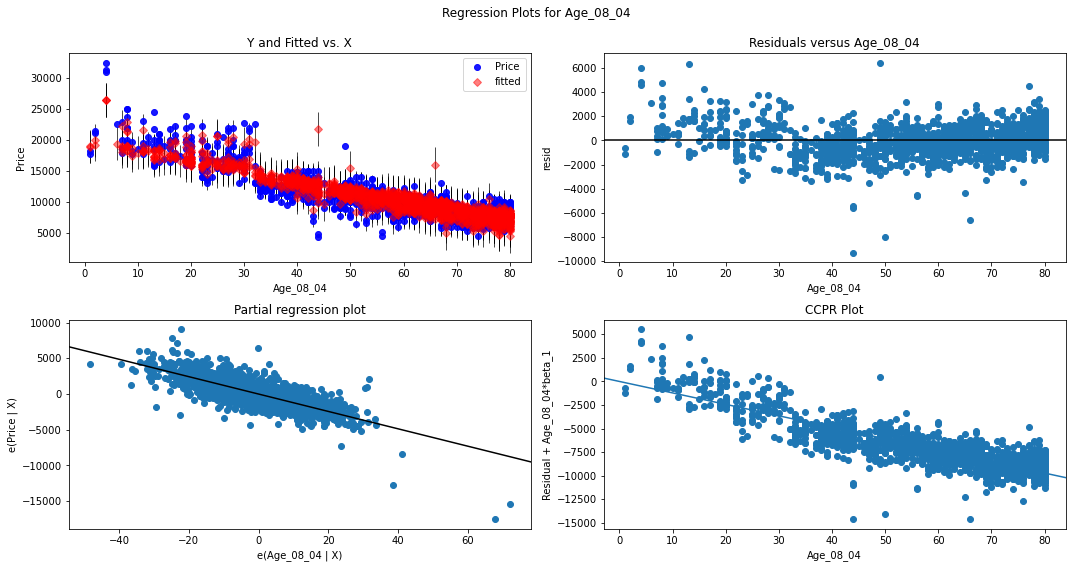

In [55]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig = fig)
plt.show()

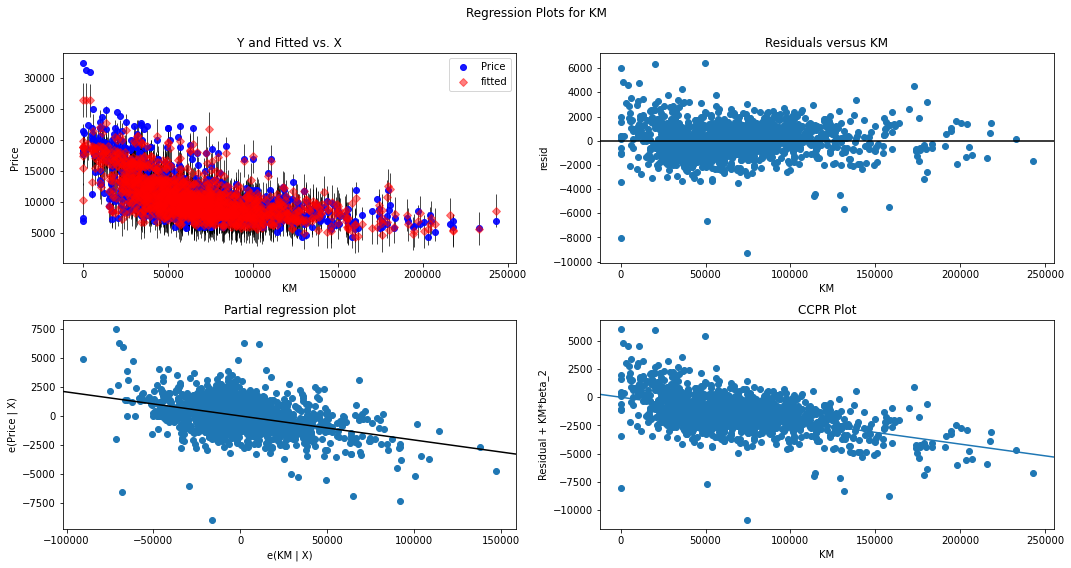

In [56]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'KM',fig = fig)
plt.show()

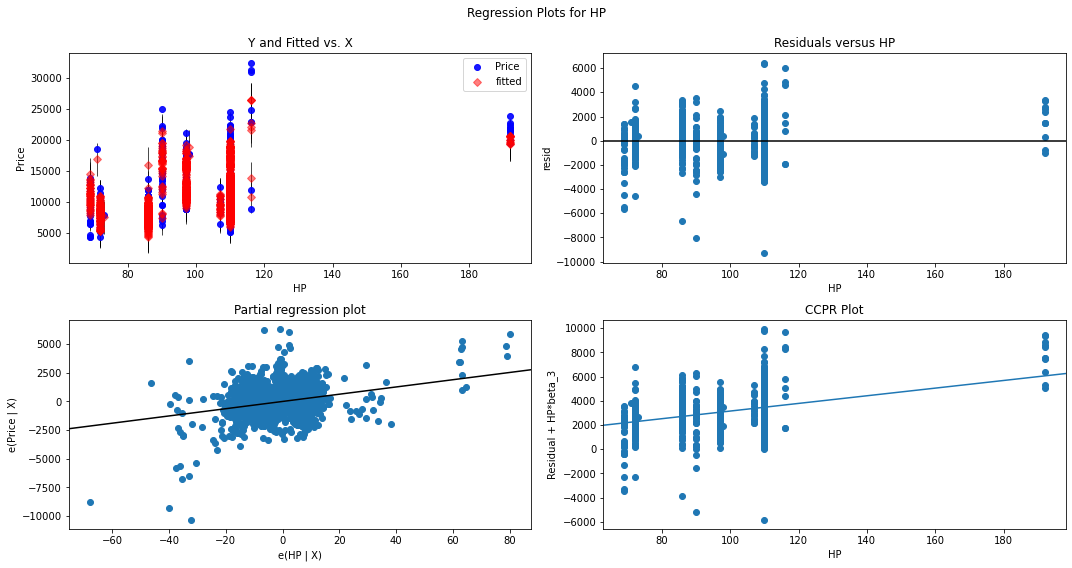

In [57]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig = fig)
plt.show()

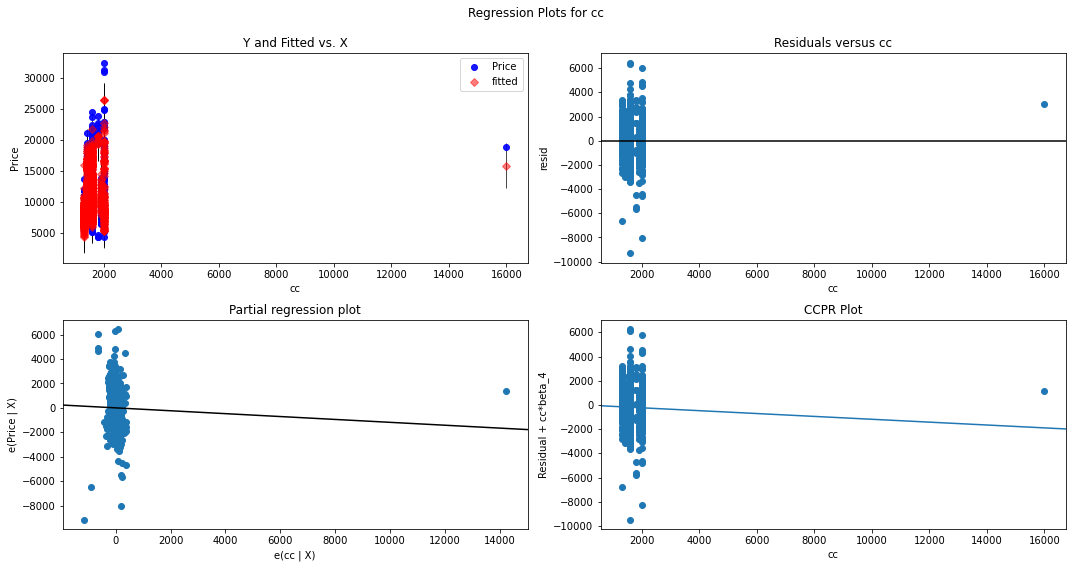

In [58]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig = fig)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

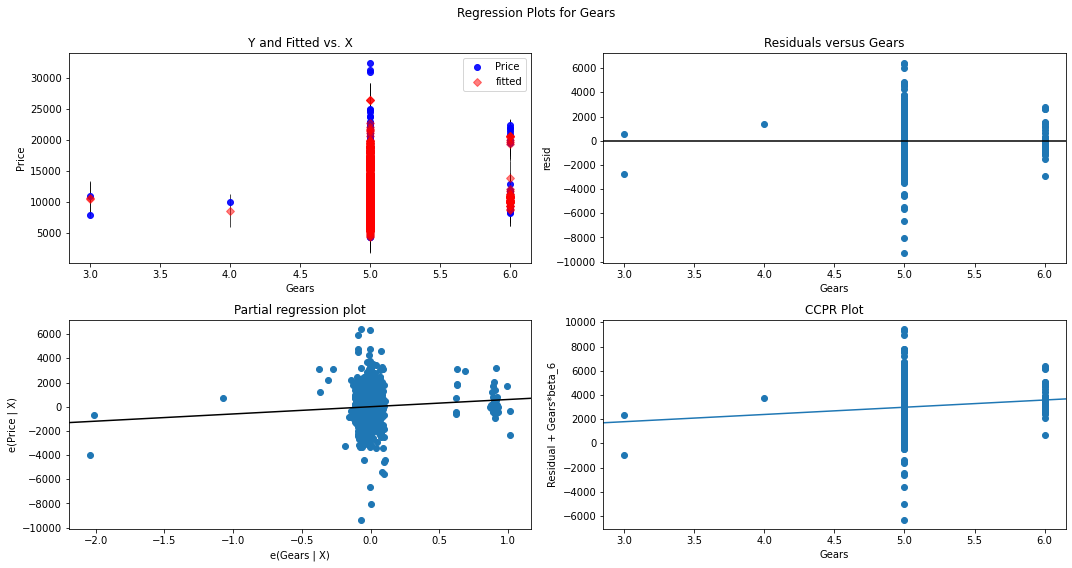

In [59]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig = fig)
plt.show

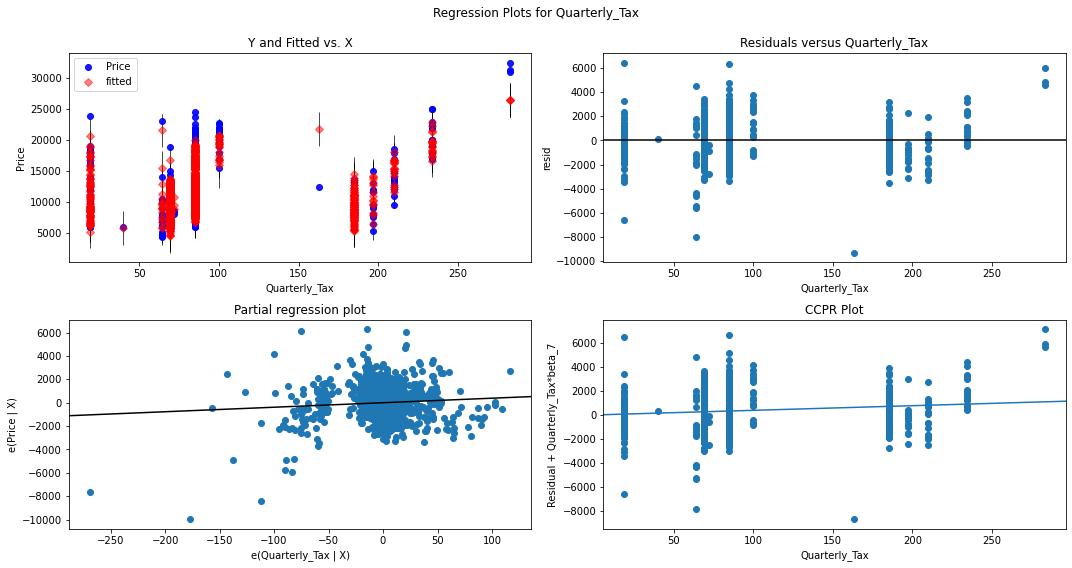

In [61]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig = fig)
plt.show()

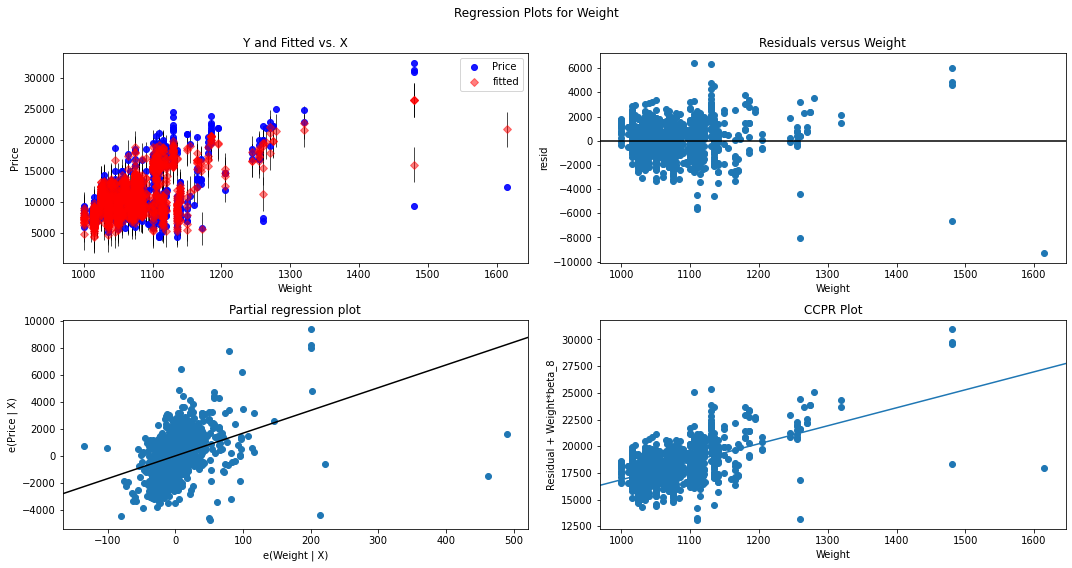

In [62]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig = fig)
plt.show()

## Detection of influencers/outliers
* cooks distance 
* leverage values

### cook's distance

In [69]:
# get outliers using cook distance, if the cook distance is greater than 1 then its outliers
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

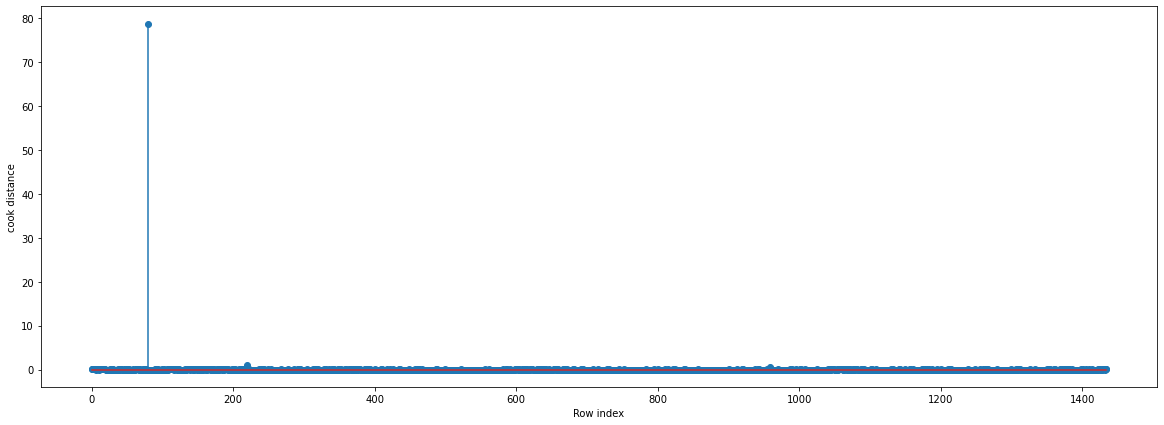

In [70]:
# plot rhe influencers using strem plot
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toya_data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cook distance')
plt.show()

In [72]:
# index and value of influencer where c > 0.5
np.argmax(c),np.max(c)

(80, 78.72950582257265)

### Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

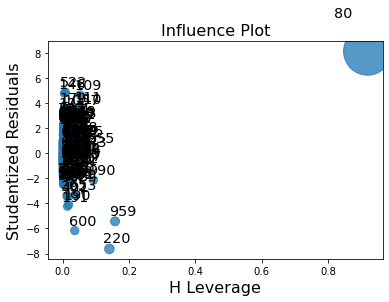

In [88]:
# from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [91]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = toya_data.shape[1]
n = toya_data.shape[0]
leverange_cutoff = (3*(k +1))/n
leverange_cutoff

0.020905923344947737

In [92]:
# from the above plot points beyond leverange cutoff value = 0.02 are the outleirs

In [94]:
toya_data[toya_data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## improving the model

In [95]:
toya_new = toya_data.copy()
toya_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [96]:
toya_new_df = toya_new.drop(toya_new.index[[80]],axis = 0).reset_index(drop = True)
toya_new_df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## build new model

In [106]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toya_new_df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toya_new_df=toya_new_df.drop(toya_new_df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toya_new_df
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toya_new_df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882331599054408


In [107]:
final_model.rsquared

0.8882331599054408

## model prediction

In [118]:
pred_data=pd.DataFrame({'Age_08_04':[10,12],'KM':[30000,40000],'HP':[70,80],'cc':[1200,1300],'Doors':[4,4],'Gears':[4,5],'Quarterly_Tax':[65,70],'Weight':[1010,1113]})

In [119]:
pred_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,10,30000,70,1200,4,4,65,1010
1,12,40000,80,1300,4,5,70,1113


In [120]:
y_predi = final_model.predict(pred_data)
y_predi

0    14216.553111
1    17590.688243
dtype: float64

In [123]:
y_predict = final_model.predict(toya_new_df.drop(labels = 'Price',axis = 1))

In [124]:
y_predict

0       16345.364655
1       15886.764776
2       16328.198914
3       15996.292641
4       15883.270622
            ...     
1425     9160.787372
1426     8535.652967
1427     8681.098024
1428     8793.249483
1429    10860.236682
Length: 1430, dtype: float64